# Diamonds price analysis and modeling:
##### In this notebook, we will explore the factors that affect the price of a diamond with a goal of finding a model to help predict the price of diamonds.

* Diamonds are the Precious stone consisting of a clear and colourless Crystalline form of pure carbon.
* They are the hardest Gemstones known to man and can be scratched only by other Diamonds.
#### Features¶

* Independent variables:
* **Carat** : Carat weight of the Diamond.
* **Cut** : Describe cut quality of the diamond (Fair, Good, Very Good, Premium, Ideal).
* **Color** : Color of the Diamond (With D being the best and J the worst).
* **Clarity** : Diamond Clarity refers to the absence of the Inclusions and Blemishes.(In order from Best to Worst) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
* **Depth** : The Height of a Diamond, measured from the Culet to the table, divided by its average Girdle Diameter.
* **Table** : The Width of the Diamond's Table expressed as a Percentage of its Average Diameter.
* **X** : Length of the Diamond in mm.
* **Y** : Width of the Diamond in mm.
* **Z** : Height of the Diamond in mm.

- Qualitative Features (Categorical) : Cut, Color, Clarity.

- Quantitative Features (Numerical) : Carat, Depth , Table , Price , X , Y, Z.

- **Price** is the Target Variable


In [145]:
import pandas as pd

In [146]:
data=pd.read_csv("diamonds.csv")
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [147]:
df=data.copy()
df=data.drop(['Unnamed: 0'],axis=1)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [148]:
df.isna().any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

In [149]:
#convert categorical values to numerical values
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [150]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [151]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

### we will convert all those categorical columns(cut,clarity,color) later

In [152]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [153]:
# we can't have a value of x,y,z =0 since there are length,width and depth
print("Number of rows with x == 0: {} ".format((df.x==0).sum()))
print("Number of rows with y == 0: {} ".format((df.y==0).sum()))
print("Number of rows with z == 0: {} ".format((df.z==0).sum()))
# or df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)] to visualize the rows in the dataset

Number of rows with x == 0: 8 
Number of rows with y == 0: 7 
Number of rows with z == 0: 20 


In [154]:
df[['x','y','z']] = df[['x','y','z']].replace(0,np.NaN)


In [155]:
df.isna().sum()


carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           8
y           7
z          20
dtype: int64

In [156]:
df.dropna(inplace=True)
df.shape
#from 53940 rows × 10 columns now we have now 53920 rows, 10columns which means we have dropped 20 rows 

(53920, 10)

In [157]:
#let's check again for missing values
df.isna().sum()


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002DB26693108>,
      dtype=object)

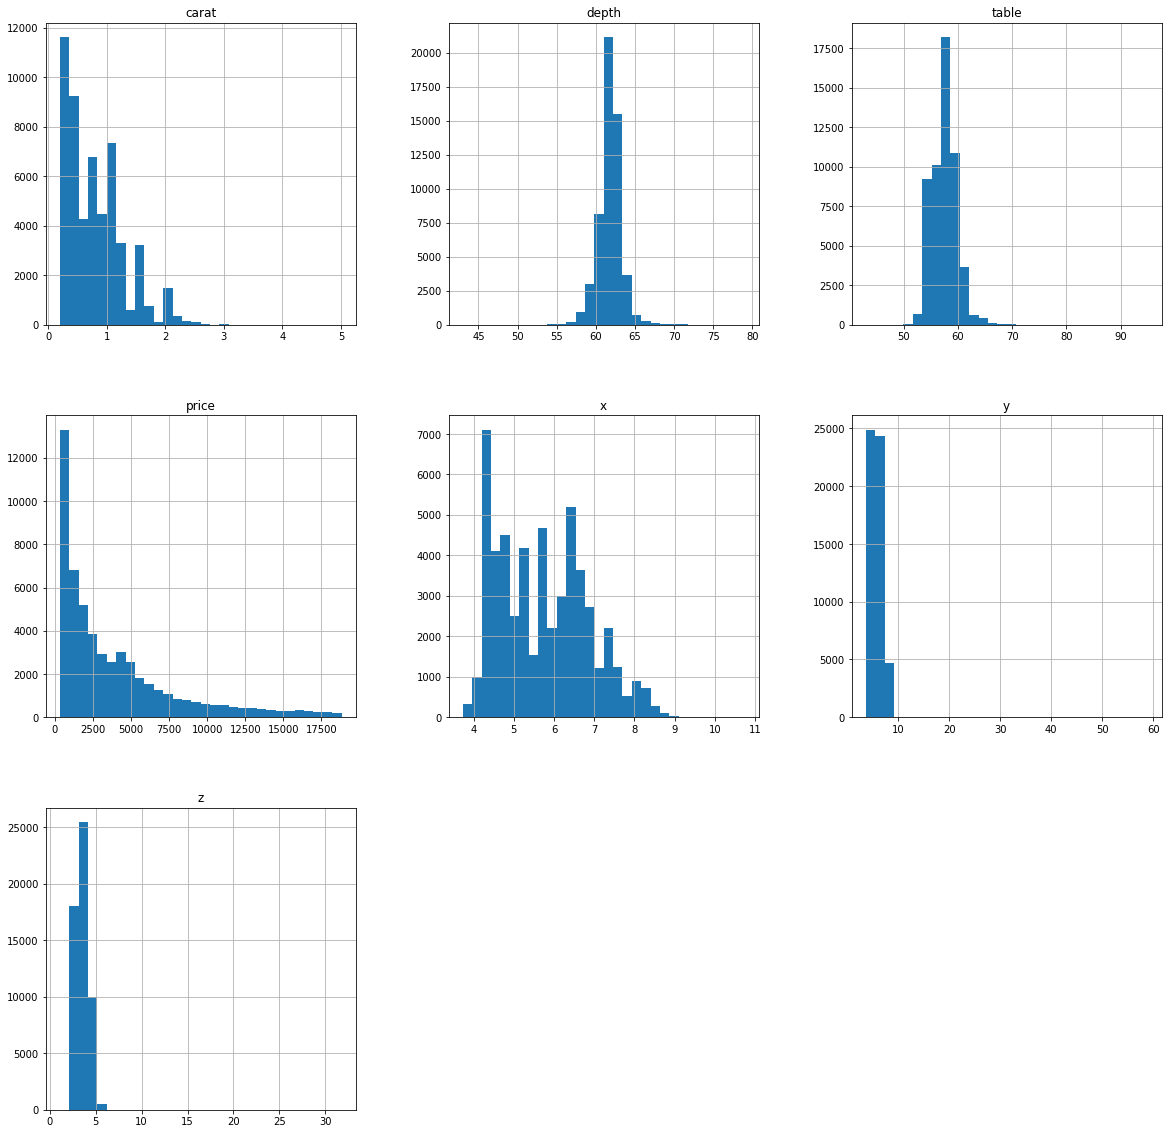

In [158]:
df.hist(figsize = (20,20),bins=30)
#most color are G(4) and clarity SI2(5)


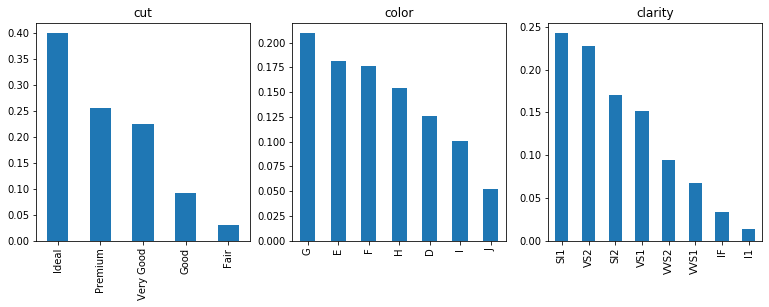

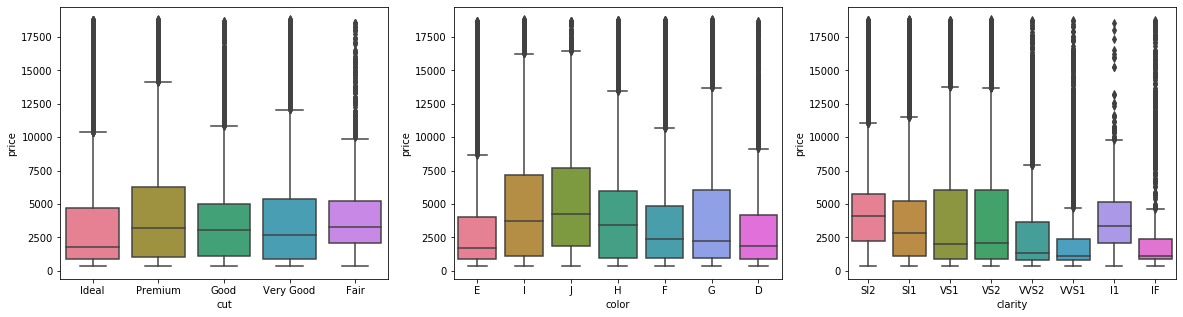

In [159]:
fig=plt.figure(figsize=(13,4))

for i,feature in enumerate(df.select_dtypes(include='O').columns.tolist(),1):

    plt.subplot(1,3,i)
    df[feature].value_counts(normalize=True).plot.bar()
    plt.title(feature)

plt.figure(figsize=(20,5))
for i,feature in enumerate(df.select_dtypes(include='O').columns.tolist(),1):
    plt.subplot(1,3,i)
    sns.boxplot(x=feature,y='price',data=df,palette='husl')
plt.show()
fig.savefig('categ_visualization.png', dpi=fig.dpi)


## CUT:
* most cut are Ideal(5) but has the lower price
* the least found cut was fair(1) but has the higher price range(higher median)

## COLOR:
* most color chosed is G(4)
* type I,J,H are the expensive ones(1,2,3)
* E,D are the cheapest

## CLARITY:
* cheapest ones are IF & WS1 ,expensive one are I1 & SI2 ,the most commons are SI1 & VS2 (however SI1 is more expensive than VS2 so the popular ones doesn't depend on their prices)


In [160]:
df['cut']=df['cut'].map({"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5})
df['color']=df['color'].map({"J": 1,"I": 2,"H": 3,"G": 4,"F": 5,"E": 6,"D": 7})
df['clarity']=df['clarity'].map({"I3": 1, "I2": 2, "I1": 3, "SI2": 4, "SI1": 5, "VS2": 6, "VS1": 7, "VVS2": 8, "VVS1": 9, "IF": 10, "FL": 11})
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,4,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,5,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,7,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,6,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,4,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,7,5,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,7,5,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,7,5,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,4,3,4,61.0,58.0,2757,6.15,6.12,3.74


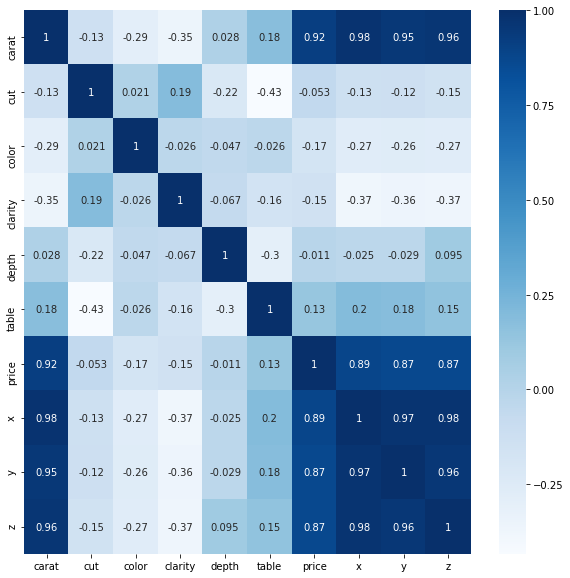

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True,cmap='Blues')
plt.show()
#there's a strong correlation between carat,x,y,z and price
#We conclude that Carat and diamonds dimensions(x,y,z) are the deciding factors for price calculation.


In [162]:
df['volume']=df['x']*df['y']*df['z']
df

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,5,6,4,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,4,6,5,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,2,6,7,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,4,2,6,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,2,1,4,63.3,58.0,335,4.34,4.35,2.75,51.917250
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,7,5,60.8,57.0,2757,5.75,5.76,3.50,115.920000
53936,0.72,2,7,5,63.1,55.0,2757,5.69,5.75,3.61,118.110175
53937,0.70,3,7,5,62.8,60.0,2757,5.66,5.68,3.56,114.449728
53938,0.86,4,3,4,61.0,58.0,2757,6.15,6.12,3.74,140.766120


In [163]:
df[['volume','price']].corr()

,volume,price
volume,1.000000,0.904255
price,0.904255,1.000000


In [233]:
import sklearn
from sklearn import svm, preprocessing
df = sklearn.utils.shuffle(df) #shuffle data to avoid any biases
X = df.iloc[:,:-1].drop("price", axis=1).values
X = preprocessing.scale(X)
y = df["price"].values
X

array([[ 3.42559859e-01,  9.81374106e-01,  3.49170224e-01, ...,
         5.79208448e-01,  5.30747185e-01,  4.98137743e-01],
       [-1.63992717e-01,  9.81374106e-01, -2.38630540e-01, ...,
         1.64132045e-02,  3.95687595e-02, -6.59977402e-05],
       [-8.39396151e-01,  8.57730668e-02,  1.52477175e+00, ...,
        -8.23313032e-01, -8.37535572e-01, -8.82598339e-01],
       ...,
       [-6.07226220e-01,  8.57730668e-02,  3.49170224e-01, ...,
        -5.01715750e-01, -5.13006969e-01, -5.97910487e-01],
       [-1.09267244e+00, -8.09827972e-01,  9.36970988e-01, ...,
        -1.37717502e+00, -1.31994295e+00, -1.30963012e+00],
       [ 1.50340951e+00, -8.09827972e-01,  3.49170224e-01, ...,
         1.39213491e+00,  1.32891213e+00,  1.52301401e+00]])

# Test/Train split

In [165]:
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression , Lasso, Ridge
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [175]:
Scores = []
models = ['SVR(kernel="linear")' , 'SVR(kernel="rbf")' , 'Multiple Linear Regression' ,'Lasso Regression', 'Ridge Regression','AdaBoost Regression']

In [176]:
clf1 = svm.SVR(kernel='linear')
clf1.fit(X_train, y_train)
print("######## MODEL:SVR(kernel='linear') ##########")
print("Score is",clf1.score(X_test, y_test))# 0 is bad,1 is good
for X,y in list(zip(X_test, y_test))[:10]:
    print(f"model predicts {clf1.predict([X])[0]}, real value: {y}")
Scores.append(clf1.score(X_test, y_test))
print(Scores)

######## MODEL:SVR(kernel='linear') ##########
Score is 0.8591647735414532
model predicts 1767.6250482033888, real value: 1625
model predicts 11583.005116153905, real value: 13812
model predicts 204.99735164599315, real value: 571
model predicts 11438.481118201567, real value: 11925
model predicts 4955.668035819931, real value: 5049
model predicts 10210.910989438818, real value: 16975
model predicts 1215.8933405969865, real value: 954
model predicts 197.96060924961785, real value: 591
model predicts 11762.916799712873, real value: 18198
model predicts 499.261573038983, real value: 642
[0.8591647735414532]


In [177]:
clf = svm.SVR(kernel='rbf')

clf.fit(X_train, y_train)
print("######## MODEL:SVR(kernel='rbf') ##########")

print("Score is",clf.score(X_test, y_test))# 0 is bad,1 is good
for X,y in list(zip(X_test, y_test))[:10]:
    print(f"model predicts {clf.predict([X])[0]}, real value: {y}")
Scores.append(clf.score(X_test, y_test))
print(Scores)

C:\Users\kaout\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


######## MODEL:SVR(kernel='rbf') ##########
Score is 0.5040812889885617
model predicts 1497.3701124722606, real value: 1625
model predicts 5718.714076414457, real value: 13812
model predicts 979.5158807092466, real value: 571
model predicts 5574.579581552416, real value: 11925
model predicts 4767.301150638522, real value: 5049
model predicts 6892.869207130789, real value: 16975
model predicts 1226.3053429443844, real value: 954
model predicts 988.4146362861811, real value: 591
model predicts 4676.99333456196, real value: 18198
model predicts 668.6623255977115, real value: 642
[0.8591647735414532, 0.5040812889885617]


In [178]:
LR=LinearRegression()
LR.fit(X_train,y_train)
print("######## MODEL:Multiple Linear Regression ##########")

y_pred=LR.predict(X_test)
print('Score:',LR.score(X_test,y_test))
print('')

print('MAE      :',mean_absolute_error(y_test,y_pred))
print('MSE      :',mean_squared_error(y_test,y_pred))
print('R2       :',r2_score(y_test,y_pred))
Scores.append(LR.score(X_test, y_test))
print(Scores)

######## MODEL:Multiple Linear Regression ##########
Score: 0.9008979787356839

MAE      : 807.0010141627722
MSE      : 1582898.681976661
R2       : 0.9008979787356839
[0.8591647735414532, 0.5040812889885617, 0.9008979787356839]


In [179]:
las_reg=Lasso()
las_reg.fit(X_train,y_train)
y_pred=las_reg.predict(X_test)
print("######## MODEL:Lasso Regression ##########")

print('Score:',las_reg.score(X_test,y_test))
print('')

print('MAE      :',mean_absolute_error(y_test,y_pred))
print('MSE      :',mean_squared_error(y_test,y_pred))
print('R2       :',r2_score(y_test,y_pred))
Scores.append(las_reg.score(X_test, y_test))
print(Scores)


######## MODEL:Lasso Regression ##########
Score: 0.9018211898012298

MAE      : 808.0634875867772
MSE      : 1568152.7710437088
R2       : 0.9018211898012299
[0.8591647735414532, 0.5040812889885617, 0.9008979787356839, 0.9018211898012298]


C:\Users\kaout\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 254584210.5370102, tolerance: 59885579.697456874
  positive)


In [180]:
rig_reg=Ridge()
rig_reg.fit(X_train,y_train)
print("###### Ridge Regression ######")

y_pred=rig_reg.predict(X_test)
print('Score    :',rig_reg.score(X_test,y_test))
print('')

print('MAE      :',mean_absolute_error(y_test,y_pred))
print('MSE      :',mean_squared_error(y_test,y_pred))
print('R2       :',r2_score(y_test,y_pred))
Scores.append(rig_reg.score(X_test, y_test))
print(Scores)

###### Ridge Regression ######
Score    : 0.9009357777114317

MAE      : 807.1016234902296
MSE      : 1582294.9410223614
R2       : 0.9009357777114316
[0.8591647735414532, 0.5040812889885617, 0.9008979787356839, 0.9018211898012298, 0.9009357777114317]


In [181]:
from sklearn.ensemble import AdaBoostRegressor
clf_ar = AdaBoostRegressor(n_estimators=1000)
clf_ar.fit(X_train , y_train)
y_pred = clf_ar.predict(X_test)
print('###### AdaBoost Regression ######')
print('Score :',clf_ar.score(X_test, y_test))

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    :' ,mean_squared_error(y_test, y_pred))
print('MAE    :',mean_absolute_error(y_test, y_pred))
print('R2     :',r2_score(y_test, y_pred))
Scores.append(clf_ar.score(X_test, y_test))
print(Scores)

###### AdaBoost Regression ######
Score : 0.8613860563230819

MSE    : 2213999.5325078694
MAE    : 1277.7324645100653
R2     : 0.8613860563230819
[0.8591647735414532, 0.5040812889885617, 0.9008979787356839, 0.9018211898012298, 0.9009357777114317, 0.8613860563230819]


In [187]:
model = pd.DataFrame({'Regression models' : models , 'Accuracy' : Scores })
model.sort_values(by='Accuracy' ,ascending=False)


,Regression models,Accuracy
3,Lasso Regression,0.901821
4,Ridge Regression,0.900936
2,Multiple Linear Regression,0.900898
5,AdaBoost Regression,0.861386
0,"SVR(kernel=""linear"")",0.859165
1,"SVR(kernel=""rbf"")",0.504081


C:\Users\kaout\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\kaout\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


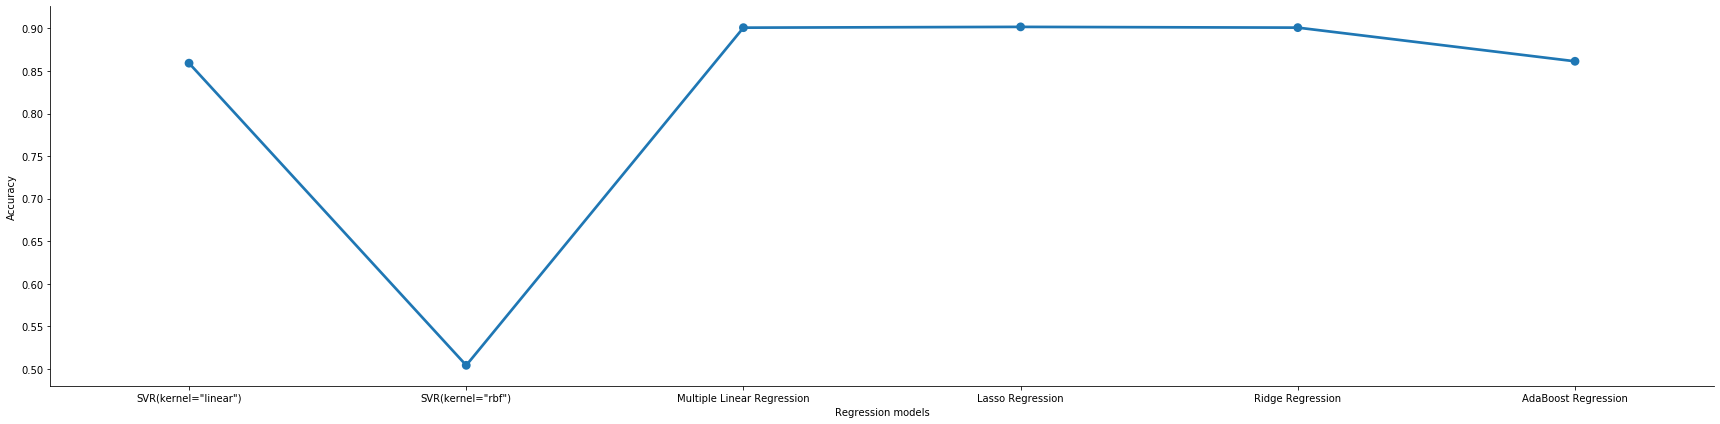

In [194]:
#Factorplot is used to perform bivariate analysis, basically for studying the relationships between a categorical variable and a continuous variable.

sns.factorplot(x='Regression models', y='Accuracy' , data=model, size=6 , aspect=4)
plt.show()


In [186]:
#lasso regression the best model (highest accuracy)
las_reg.predict([[0.8,5,6,7,62.1,58,6.3,4.08,3.5]])

array([5701.18249015])

In [242]:
#save the model
import pickle
pickle.dump(las_reg, open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[0.8,3,6,7,62.1,58,6.3,4.08,3.5]]))

[5445.20148413]
